In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
# Importing all packages from the fastai.vision library
from fastai.vision import *
import torchvision

In [3]:
# Creating a list of the classes of images to be classified
classes = ['daffodil', 'rose', 'tulip', 'iris', 'daisy', 'hyacinth',
           'oriental_lily', 'dahlia', 'orchid', 'hydrangea']

In [4]:
# Defining location path for the dataset images
path = Path('data/flowers')

In [5]:
# Checking all images that were downloaded can be opened
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

daffodil


rose


tulip


iris


daisy


hyacinth


oriental_lily


dahlia


orchid


hydrangea


In [6]:
# setting random seed to 42 - the answer to life, the universe and everything
np.random.seed(42)
# Create from imagenet style dataset/databunch object in path with training set 
# and validation set with an 80:20 split with all images normalised
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
# Confirming the classes in the data object
data.classes

['daffodil',
 'dahlia',
 'daisy',
 'hyacinth',
 'hydrangea',
 'iris',
 'orchid',
 'oriental_lily',
 'rose',
 'tulip']

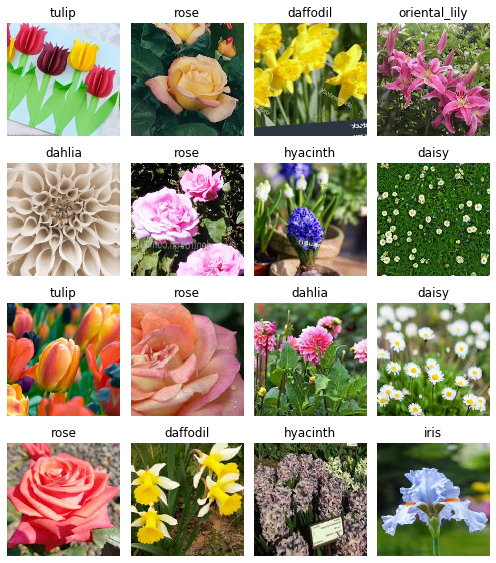

In [8]:
# Showing a sample of images of the batch 
data.show_batch(rows=4, figsize=(7,8))

In [9]:
# Confirming the class names, number of classes, length of the training and 
# validation datasets
# if done correctly with no issues with the images we should get a length of 
# 960 for the training dataset and 240 for the validation dataset
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['daffodil',
  'dahlia',
  'daisy',
  'hyacinth',
  'hydrangea',
  'iris',
  'orchid',
  'oriental_lily',
  'rose',
  'tulip'],
 10,
 1483,
 370)

In [14]:
# instantiate the cnn_learner model for our data, with resnet34, 
# and error rate as the metric
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
# Fitting our model to the data with 4 epochs

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.113904,0.439015,0.132432,1:09:46


In [ ]:
# Saving this version of our model
learn.save('stage_1')

In [ ]:
# This is unfreezing the initial layers weights to train the model at a lower level
# than before.
# The initial layers are mostly used for understanding low-level features like 
# curves, lines, shapes, patterns. When we use pre-trained models they are trained 
# for identifying these features on a large dataset of images like Imagenet(1000 categories).

learn.unfreeze()

In [ ]:
# Finding the learning rate of the model to help identify a parameter where the 
# model can be improved
learn.lr_find()


In [ ]:
# Plotting the learning rate
learn.recorder.plot()

In [ ]:
# Re-training the unfrozen model with 4 epochs and lr from 3e-4 to 3e-3
learn.fit_one_cycle(4, max_lr=slice(3e-4,3e-3))

In [ ]:
# Saving this version of the model
learn.save('stage_2')


## Interpretation

In [ ]:
# Loading the stage_2 version of the model
learn.load('stage_2')

In [ ]:
# Createing an instance of ClassificationInterpretation. 
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
# Plotting the confusion matrix 
interp.plot_confusion_matrix()

In [ ]:
# Calculating the top losses and indexing them
losses,idxs = interp.top_losses()
# Checking that the lengths of the validation dataset, all lose values, and indexes
# are equal
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
# Plotting the top 16 losses
interp.plot_top_losses(16, figsize=(15,11))